In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np
import pandas as pd

random_state=0
nb_breeds = 20
file_path = '/content/drive/My Drive/Colab Notebooks/'


In [0]:
!mkdir data

In [4]:
!wget -P /content/data 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'


--2019-04-09 16:22:36--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘/content/data/images.tar’

images.tar          100%[===================>] 756.82M  20.6MB/s    in 42s     

2019-04-09 16:23:18 (18.2 MB/s) - ‘/content/data/images.tar’ saved [793579520/793579520]



In [0]:
!tar xf /content/data/images.tar -C /content/data

In [0]:
!rm -rf /content/data/images.tar

In [0]:
# For the given path, get the List of all files in the directory tree 

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [0]:
files = getListOfFiles('/content/data/')

In [0]:
labels = []

for f in files :
    labels.append(f.split('-')[1].split('\\')[0].split('/')[0])

In [10]:
df = pd.DataFrame({'filename' : files, 'breed' : labels})
df.head()

,breed,filename
0,Norwich_terrier,/content/data/Images/n02094258-Norwich_terrier...
1,Norwich_terrier,/content/data/Images/n02094258-Norwich_terrier...
2,Norwich_terrier,/content/data/Images/n02094258-Norwich_terrier...
3,Norwich_terrier,/content/data/Images/n02094258-Norwich_terrier...
4,Norwich_terrier,/content/data/Images/n02094258-Norwich_terrier...


In [0]:
#df.to_csv('/content/drive/My Drive/Colab Notebooks/df_labelled_image.csv')

In [0]:
df_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_labelled_image.csv')


In [0]:
full_breeds = df_full['breed'].unique()

In [0]:
# select 10 random breeds

breeds = list(full_breeds[0:20])

In [14]:
breeds

['Norwegian_elkhound',
 'chow',
 'Great_Dane',
 'cairn',
 'pug',
 'papillon',
 'toy_poodle',
 'Mexican_hairless',
 'groenendael',
 'Sussex_spaniel',
 'Ibizan_hound',
 'boxer',
 'Greater_Swiss_Mountain_dog',
 'Chihuahua',
 'Afghan_hound',
 'Staffordshire_bullterrier',
 'African_hunting_dog',
 'schipperke',
 'bull_mastiff',
 'Bedlington_terrier']

In [0]:
df = df_full[df_full['breed'].isin(breeds)].sample(frac=1)


In [0]:
df.shape

(3462, 3)

In [16]:
# Import the required packages
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
% matplotlib inline



Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def preprocess(img) :
    img = load_img(img, target_size=(224, 224))  # Charger l'image
    img = img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
    return img

In [18]:

breeds = list(df['breed'].unique())
breeds

['Bedlington_terrier',
 'Afghan_hound',
 'groenendael',
 'Sussex_spaniel',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'bull_mastiff',
 'papillon',
 'boxer',
 'cairn',
 'Chihuahua',
 'Mexican_hairless',
 'African_hunting_dog',
 'Great_Dane',
 'toy_poodle',
 'Staffordshire_bullterrier',
 'schipperke',
 'pug',
 'Norwegian_elkhound',
 'chow']

In [19]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import optimizers
from keras.layers import Dense, Flatten


# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output


# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions = Dense(len(breeds), activation='softmax')(Flatten()(x))

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 5s 0us/step


In [0]:
for layer in model.layers:
   layer.trainable = False

In [0]:
# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])




In [0]:
X_array = np.array([preprocess(filename)[0] for filename in df.filename.values])
#np.save('/content/drive/My Drive/Colab Notebooks/preprocessed_images',X_array)

In [0]:
labels = df.breed.values


In [0]:

#no need to shuffle, df is already shuffled, via df.sample()

split_1 = int(0.8 * len(df))
split_2 = int(0.9 * len(df))
train_img = X_array[:split_1]
train_labels = labels[:split_1]
valid_img = X_array[split_1:split_2]
valid_labels = labels[split_1:split_2]
test_img = X_array[split_2:]
test_labels = labels[split_2:]

In [25]:
train_img.shape

(2769, 224, 224, 3)

In [26]:
train_labels.shape

(2769,)

In [27]:
breeds

['Bedlington_terrier',
 'Afghan_hound',
 'groenendael',
 'Sussex_spaniel',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'bull_mastiff',
 'papillon',
 'boxer',
 'cairn',
 'Chihuahua',
 'Mexican_hairless',
 'African_hunting_dog',
 'Great_Dane',
 'toy_poodle',
 'Staffordshire_bullterrier',
 'schipperke',
 'pug',
 'Norwegian_elkhound',
 'chow']

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_train = ohe.fit_transform(train_labels.reshape(-1, 1), )

In [29]:
y_train.shape

(2769, 20)

In [30]:
model_info = new_model.fit(train_img, y_train, epochs=20, batch_size=200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 48s - loss: 12.5488 - acc: 0.1571
Epoch 2/20
 - 25s - loss: 7.8177 - acc: 0.4731
Epoch 3/20
 - 25s - loss: 5.1946 - acc: 0.6425
Epoch 4/20
 - 25s - loss: 4.3751 - acc: 0.7060
Epoch 5/20
 - 25s - loss: 3.9128 - acc: 0.7447
Epoch 6/20
 - 25s - loss: 3.6757 - acc: 0.7645
Epoch 7/20
 - 25s - loss: 3.5956 - acc: 0.7714
Epoch 8/20
 - 25s - loss: 3.4842 - acc: 0.7783
Epoch 9/20
 - 25s - loss: 3.4235 - acc: 0.7855
Epoch 10/20
 - 25s - loss: 3.4033 - acc: 0.7866
Epoch 11/20
 - 25s - loss: 3.3928 - acc: 0.7887
Epoch 12/20
 - 25s - loss: 3.3875 - acc: 0.7898
Epoch 13/20
 - 25s - loss: 3.3816 - acc: 0.7895
Epoch 14/20
 - 25s - loss: 3.3786 - acc: 0.7902
Epoch 15/20
 - 25s - loss: 3.3686 - acc: 0.7905
Epoch 16/20
 - 25s - loss: 3.3664 - acc: 0.7909
Epoch 17/20
 - 25s - loss: 3.3645 - acc: 0.7913
Epoch 18/20
 - 25s - loss: 3.3646 - acc: 0.7913
Epoch 19/20
 - 25s - loss: 3.3645 - acc: 0.7913
Epoch 20/20
 - 25s - loss: 3.3645 - acc: 0.7913


In [0]:
y_valid = ohe.transform(valid_labels.reshape(-1, 1))

In [0]:
new_model.evaluate(valid_img, y_valid, verbose=0)

[4.6570882576738475, 0.6820809262336334]

In [0]:
y_pred = new_model.predict(valid_img)
y_pred

array([[1.0848771e-08, 2.1778342e-06, 5.8253002e-16, ..., 7.6901135e-24,
        6.4062423e-01, 2.5934463e-12],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.8691225e-01],
       [0.0000000e+00, 1.2562276e-26, 1.9339709e-32, ..., 0.0000000e+00,
        4.7126626e-11, 1.0612046e-33]], dtype=float32)

In [0]:
import pickle
# save the model to disk
filename = file_path +'re_traing_GVV16.sav'
pickle.dump(new_model, open(filename, 'wb'))



In [0]:
np.save(file_path + 'breeds', breeds)

In [0]:
classes = ohe.categories_[0]
classes[0]

'Afghan_hound'

In [0]:
ohe.categories_

[array(['Afghan_hound', 'African_hunting_dog', 'Bedlington_terrier',
        'Chihuahua', 'Great_Dane', 'Greater_Swiss_Mountain_dog',
        'Ibizan_hound', 'Mexican_hairless', 'Norwegian_elkhound',
        'Staffordshire_bullterrier', 'Sussex_spaniel', 'boxer',
        'bull_mastiff', 'cairn', 'chow', 'groenendael', 'papillon', 'pug',
        'schipperke', 'toy_poodle'], dtype=object)]

In [0]:
valid_pred = []

for i in range(len(y_pred)) :
  class_index = y_pred[i].argmax()
  valid_pred.append(list(classes)[class_index])
  


In [0]:
y_pred2 = ohe.inverse_transform(y_pred)
y_valid2 = ohe.inverse_transform(y_valid)

In [0]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_valid2, y_pred2, labels=None, sample_weight=None)


In [0]:
np.save('/content/drive/My Drive/Colab Notebooks/confusion_matrix',cf)

In [0]:
import seaborn as sns

def print_confusion_matrix(cf) :
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax = sns.heatmap(cf, cmap='Greens')
    ax.set_title('Confusion matrix of the classifier', size=20)
    ax.set_xlabel('Predicted', size = 14)
    ax.set_ylabel('True', size = 14)
    ax.set_xticklabels(list(classes), rotation=90)
    ax.set_yticklabels(list(classes)[::-1],rotation=0)
    plt.show()

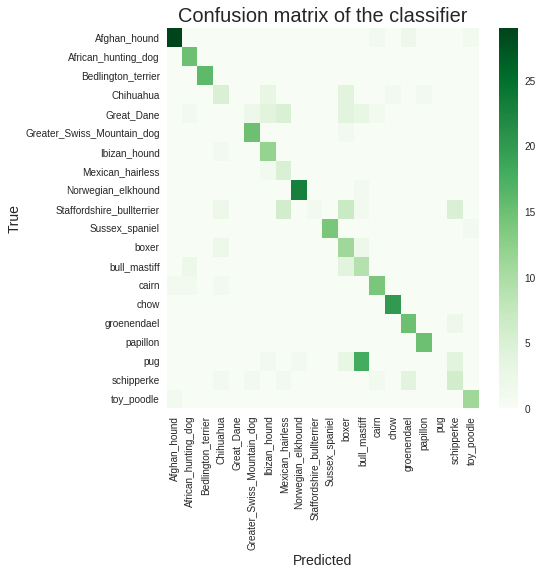

In [0]:
print_confusion_matrix(cf)

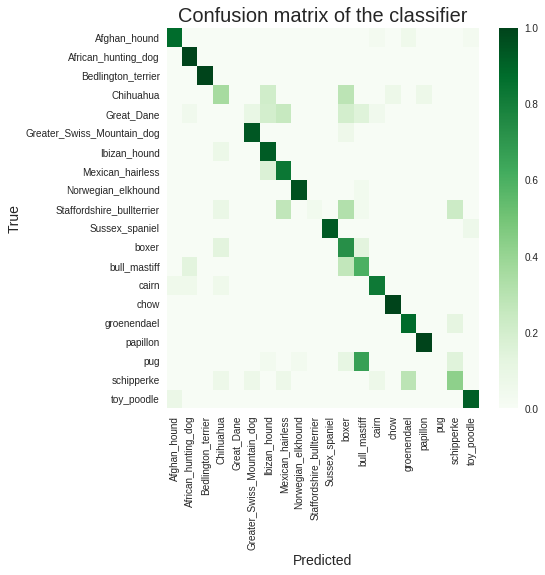

In [0]:
cf_normalised = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
np.save('/content/drive/My Drive/Colab Notebooks/confusion_matrix_normalised',cf_normalised)
print_confusion_matrix(cf_normalised)

le pug est mal classifié. 

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_valid2, y_pred2, target_names=list(classes)))

                            precision    recall  f1-score   support

              Afghan_hound       0.94      0.88      0.91        33
       African_hunting_dog       0.79      1.00      0.88        15
        Bedlington_terrier       1.00      1.00      1.00        16
                 Chihuahua       0.42      0.36      0.38        14
                Great_Dane       0.00      0.00      0.00        20
Greater_Swiss_Mountain_dog       0.83      0.94      0.88        16
              Ibizan_hound       0.57      0.92      0.71        13
          Mexican_hairless       0.29      0.83      0.43         6
        Norwegian_elkhound       0.96      0.96      0.96        24
 Staffordshire_bullterrier       1.00      0.05      0.09        22
            Sussex_spaniel       1.00      0.93      0.97        15
                     boxer       0.32      0.73      0.45        15
              bull_mastiff       0.26      0.60      0.37        15
                     cairn       0.82      0.82

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


L'Appenzeller,  le cocker spaniel et le boston bull, bull mastiff sont mal classifiés. le bullmastiff est confondu avec le pug (même museau) . L'Appenzeller est confondu avec l'entlebucher (même robe tricolore). le boston bull est confondu avec le chiouaoua (mêmes grandes oreilles) 
et le pub (mêm museau aplati)

script

In [0]:
img_filename = file_path + 'berger-belge-groenendael.jpg'
img = load_img(img_filename)


In [0]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def preprocess(img) :
    #img = load_img(img, target_size=(224, 224))  # Charger l'image
    img = img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
    return img

In [0]:
def predict_breed(img) :	
  processed_img = preprocess(img)
  model = pickle.load(open(file_path +'re_traing_GVV16.sav', 'rb'))
  pred = model.predict(processed_img)
  breeds = np.load(file_path + 'breeds.npy')
  result = breeds[pred.argmax()]
  return result

In [55]:
predict_breed(img)

ValueError: ignored